In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from textwrap import wrap

In [2]:
##Initialising font design 
titlefont = {'color':  'dimgrey',
        'weight': 'bold',
        'size': 18}
agreementlabels= ['Strongly Disagree','Disagree','Undecided','Agree','Strongly Agree']
regulationlabels=['Unregulated','Slightly regulated', 'Moderately regulated','Quite regulated','Heavily regulated']

In [3]:
df = pd.read_excel('./AIsecondary.xlsx', usecols=[1,2,3,5,7,8,9,10,12,13,14,15])
df.rename(columns={"What is your age?":"Age", "What is your highest qualification?": "Education",
                  "Which gender do you most strongly identify with?": "Gender", "Should the development of Artificial Intelligence be regulated?": "Regulation",
                  "Do you fear the potential of Artificial Intelligence?":"Fear of AI", "If you answered 'Yes', what do you think influenced your answer?":"Fear influence",
                  "Will Artificial Intelligence surpass human intelligence?": "Intelligence", "Should Artificial Intelligence be able to make moral decisions? - For example: An autonomous car may decide to sacrifice the occupant(s) to avoid hitting a child.":"Moral decision",
                  "Should Artificial Intelligence be involved in warfare? - Autonomous weapons are currently in development":"Warfare",
                  "Do we need Artificial Intelligence for humanity to progress as a species?":"Progression", "Would you be happy to live / work alongside Artificial Intelligence as equals?":"Work with AI",
                  "Do you believe that Artificial Intelligence will take over jobs that can currently only be performed by humans?": "Taking job"}, inplace=True)
df['Age'] = df['Age'].astype('category')
df['Education'] = df['Education'].astype(pd.CategoricalDtype(categories=['A level or equivalent','University degree','Diploma in higher education'],ordered=False))
df.head(10)

,Age,Education,Gender,Regulation,Fear of AI,Fear influence,Intelligence,Moral decision,Warfare,Progression,Work with AI,Taking job
0,18-24,A level or equivalent,Male,5,No,NaN,4,2,1,2,1,Yes
1,18-24,A level or equivalent,Male,5,Yes,"Science Fiction (Books, movies, TV shows)",4,3,4,1,5,Yes
2,25-34,A level or equivalent,Male,5,Yes,My own research,5,4,2,4,4,Yes
3,25-34,University degree,Female,5,Yes,"Science Fiction (Books, movies, TV shows)",4,2,1,2,2,No
4,25-34,University degree,Female,5,Yes,"Science Fiction (Books, movies, TV shows)",4,2,1,2,2,No
5,18-24,A level or equivalent,Female,4,No,NaN,1,1,1,1,2,Yes
6,18-24,University degree,Female,5,No,NaN,5,1,3,4,4,Yes
7,25-34,University degree,Male,3,Yes,"Science Fiction (Books, movies, TV shows)",3,3,3,4,3,Yes
8,18-24,NaN,Non-binary,5,No,NaN,5,3,1,5,5,Yes
9,35-44,University degree,Male,4,Yes,Other peoples opinions,4,5,4,5,5,Yes


## Demographic visualizations

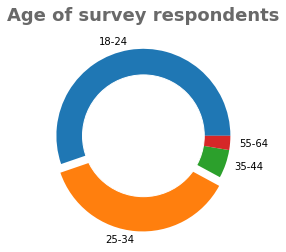

In [4]:
age = df['Age'].value_counts()
agelabels = ['18-24', '25-34', '35-44', '55-64']
explode = (0, 0.1, 0, 0)
plt.pie(age, labels=agelabels, explode=explode)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Age of survey respondents',fontdict=titlefont)
plt.show()

<Figure size 576x432 with 0 Axes>

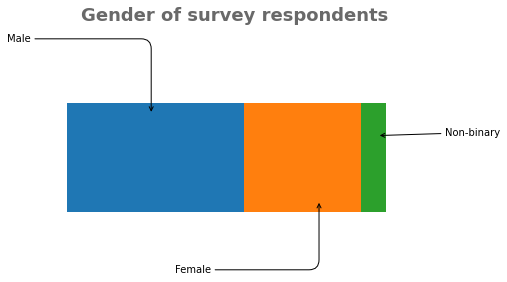

In [5]:
fig = plt.figure(figsize=(8,6))

ax= df['Gender'].value_counts().to_frame().T.plot.barh(stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

offset = 72
x = 10
y = 0.2
arrowprops = dict( 
    arrowstyle = "->", 
    connectionstyle = "angle, angleA = 0, angleB = 90, rad = 10")

ax.annotate('Male', 
            (x, y), xytext =(-2 * offset, offset), 
            textcoords ='offset points', arrowprops = arrowprops) 
female = ax.annotate('Female', 
            (30, -0.2), xytext =(-2 * offset, -offset), 
            textcoords ='offset points', arrowprops = arrowprops) 
nonbinary = ax.annotate('Non-binary', xy=(37, 0.1), xytext=(45, 0.1), arrowprops=dict(arrowstyle="->"))
ax.get_legend().remove()

ax.set_title('Gender of survey respondents',y=1.1, fontdict=titlefont)
plt.show()

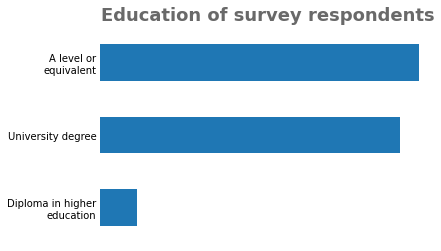

In [6]:
educationlabels = ['A level or equivalent','University degree', 'Diploma in higher education']
educationlabels =['\n'.join(wrap(i, 20)) for i in educationlabels]
ax = df['Education'].value_counts().plot.barh()
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_yticklabels(educationlabels)

ax.set_title('Education of survey respondents', fontdict=titlefont)
plt.show()

# AGE - exploratory visualizations

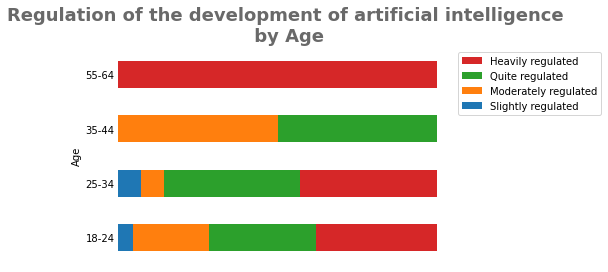

In [7]:
agereg = pd.crosstab(df['Age'],df['Regulation'], normalize='index')*100
agereg.round(1)

ax = agereg.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(regulationlabels),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_title('Regulation of the development of artificial intelligence\n by Age', fontdict=titlefont)
plt.show()

<Figure size 576x432 with 0 Axes>

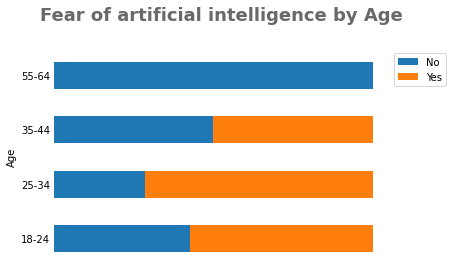

In [8]:
fig = plt.figure(figsize=(8,6))

fearagetable = pd.crosstab(df['Age'],df['Fear of AI'], normalize='index')*100
ax = fearagetable.plot.barh(stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

#move box with labels to outside of graph and use new labels declared above
ax.legend(bbox_to_anchor=(1.0,1.0))

ax.set_title('Fear of artificial intelligence by Age', y=1.1,fontdict=titlefont)
plt.xticks(rotation=360)
plt.show()

<Figure size 576x432 with 0 Axes>

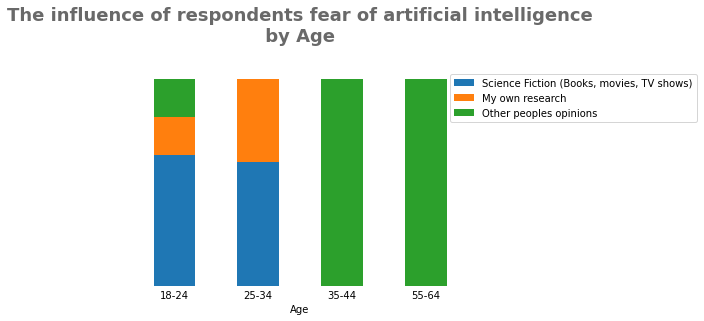

In [36]:
fig = plt.figure(figsize=(8,6))
df['Fear influence'] = df['Fear influence'].astype(pd.CategoricalDtype(categories=['Science Fiction (Books, movies, TV shows)','My own research','Other peoples opinions'],ordered=False))
fearinagetable = pd.crosstab(df['Age'],df['Fear influence'], normalize='index')*100
ax = fearinagetable.plot.bar(stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])

ax.legend(bbox_to_anchor=(1.7,1.0))

plt.xticks(rotation=360)

ax.set_title('The influence of respondents fear of artificial intelligence\n by Age ', y=1.1,fontdict=titlefont)
plt.show()

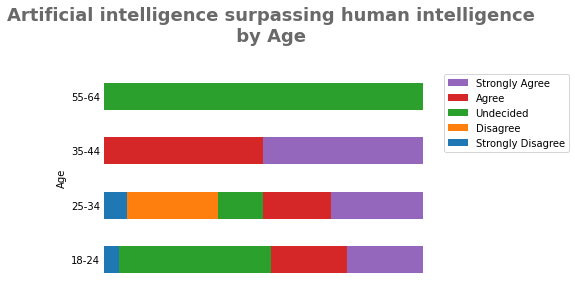

In [10]:
intelligencelabels = agreementlabels
ageintel = pd.crosstab(df['Age'],df['Intelligence'], normalize='index')*100
ageintel.round(1)

ax = ageintel.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(intelligencelabels),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_title('Artificial intelligence surpassing human intelligence\n by Age ', y=1.1,fontdict=titlefont)
plt.show()

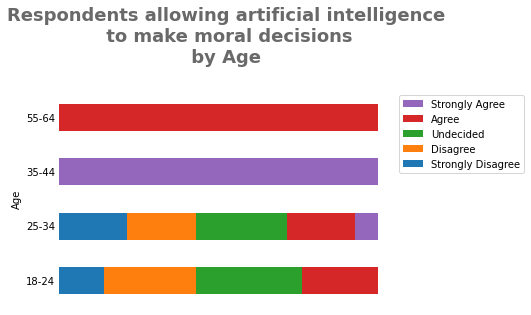

In [11]:
morallabels = agreementlabels
agemoral = pd.crosstab(df['Age'],df['Moral decision'], normalize='index')*100
agemoral.round(1)

ax = agemoral.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(morallabels),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_title('Respondents allowing artificial intelligence\n to make moral decisions\n by Age ', y=1.1,fontdict=titlefont)
plt.show()

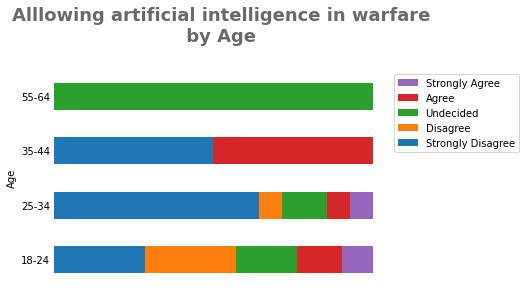

In [12]:
warfarelables = agreementlabels
agewar = pd.crosstab(df['Age'],df['Warfare'], normalize='index')*100
agewar.round(1)

ax = agewar.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(warfarelables),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_title('Alllowing artificial intelligence in warfare\n by Age ', y=1.1,fontdict=titlefont)
plt.show()

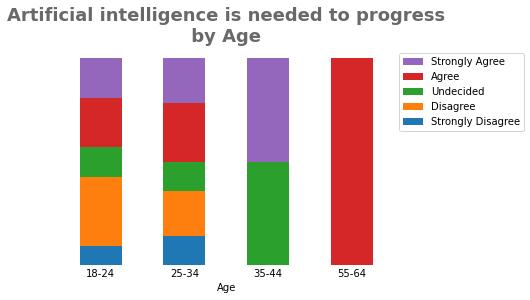

In [13]:
progresslables = agreementlabels
ageprog = pd.crosstab(df['Age'],df['Progression'], normalize='index')*100
ageprog.round(1)

ax = ageprog.plot.bar(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(progresslables),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
plt.xticks(rotation=360)

ax.set_title('Artificial intelligence is needed to progress\n by Age ',fontdict=titlefont)
plt.show()

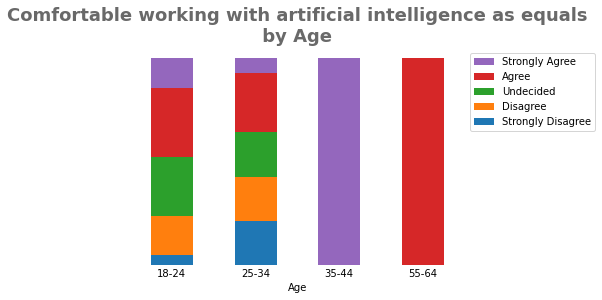

In [14]:
workailables = agreementlabels
agework = pd.crosstab(df['Age'],df['Work with AI'], normalize='index')*100
agework.round(1)

ax = agework.plot.bar(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(workailables),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
plt.xticks(rotation=360)

ax.set_title('Comfortable working with artificial intelligence as equals\n by Age ',fontdict=titlefont)
plt.show()

<Figure size 576x432 with 0 Axes>

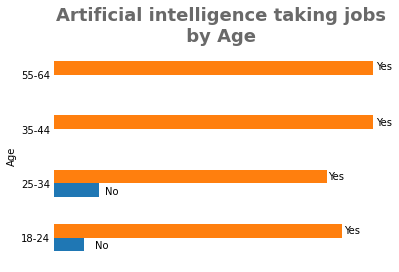

In [37]:
fig = plt.figure(figsize=(8,6))
agejob = pd.crosstab(df['Age'],df['Taking job'], normalize='index')*100
label=['Yes','No']
ax = agejob.plot.barh()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
#ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

#55-64
ax.text(101,3.09,'Yes')

#35-34
ax.text(101,2.07,'Yes')

#25-34
ax.text(86,1.07,'Yes')
ax.text(16,0.8,'No')

#18-24
ax.text(91,0.07,'Yes')
ax.text(13,-0.2,'No')

ax.set_title('Artificial intelligence taking jobs\n by Age ',fontdict=titlefont)
ax.get_legend().remove()

# EDUCATION - exploratory visualizations

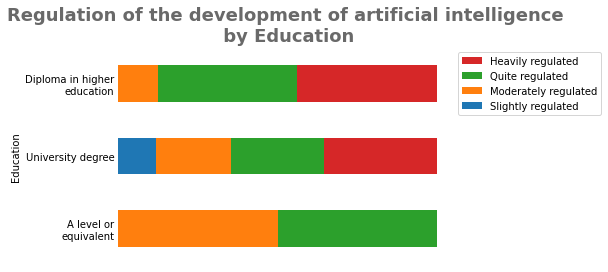

In [16]:

edureg = pd.crosstab(df['Education'],df['Regulation'], normalize='index')*100
edureg.sort_values(by=5,inplace =True)
edureg.round(1)

ax = edureg.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(regulationlabels),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_yticklabels(educationlabels)

ax.set_title('Regulation of the development of artificial intelligence\n by Education', fontdict=titlefont)
plt.show()

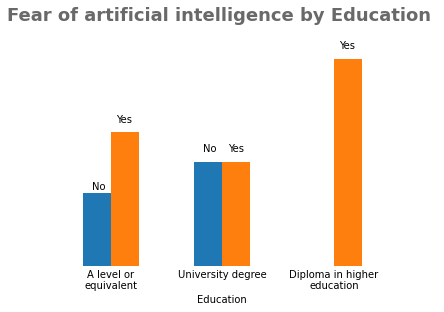

In [17]:
fearedutable = pd.crosstab(df['Education'],df['Fear of AI'], normalize='index')*100

ax = fearedutable.plot.bar()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
ax.get_legend().remove()

ax.text(-0.17,37,'No')
ax.text(0.05,69,'Yes')

ax.text(0.83,55,'No')
ax.text(1.05,55,'Yes')

ax.text(2.05,105,'Yes')


ax.set_xticklabels(educationlabels)

ax.set_title('Fear of artificial intelligence by Education ', y=1.1,fontdict=titlefont)
plt.xticks(rotation=360)
plt.show()

<Figure size 576x432 with 0 Axes>

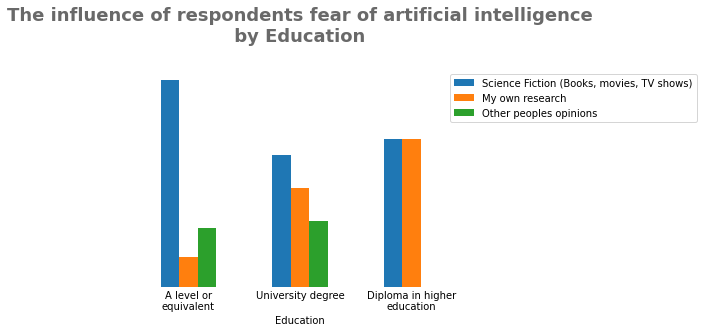

In [18]:
fig = plt.figure(figsize=(8,6))
fearinedutable = pd.crosstab(df['Education'],df['Fear influence'], normalize='index')*100
ax = fearinedutable.plot.bar()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])

ax.legend(bbox_to_anchor=(1.7,1.0))

ax.set_xticklabels(educationlabels)

ax.set_title('The influence of respondents fear of artificial intelligence\n by Education ', y=1.1,fontdict=titlefont)
plt.xticks(rotation=360)
plt.show()

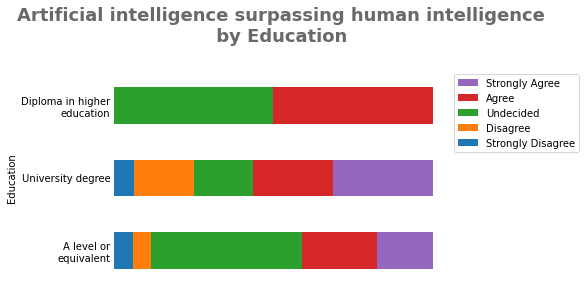

In [20]:
eduintel = pd.crosstab(df['Education'],df['Intelligence'], normalize='index')*100
eduintel.round(1)

ax = eduintel.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(intelligencelabels),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_yticklabels(educationlabels)
ax.set_title('Artificial intelligence surpassing human intelligence\n by Education ', y=1.1,fontdict=titlefont)
plt.show()

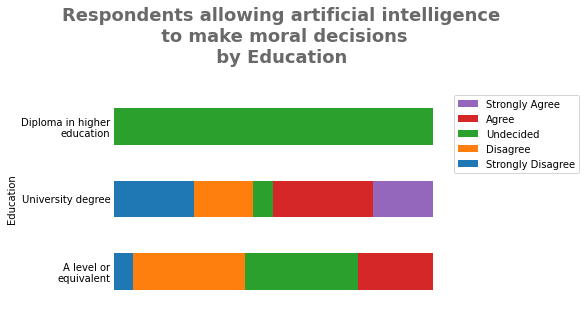

In [21]:
edumoral = pd.crosstab(df['Education'],df['Moral decision'], normalize='index')*100
edumoral.round(1)

ax = edumoral.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(morallabels),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_yticklabels(educationlabels)

ax.set_title('Respondents allowing artificial intelligence\n to make moral decisions\n by Education ', y=1.1,fontdict=titlefont)
plt.show()

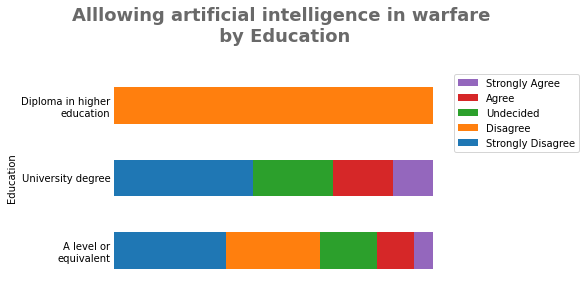

In [22]:
eduwar = pd.crosstab(df['Education'],df['Warfare'], normalize='index')*100
eduwar.round(1)

ax = eduwar.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(warfarelables),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_yticklabels(educationlabels)

ax.set_title('Alllowing artificial intelligence in warfare\n by Education', y=1.1,fontdict=titlefont)
plt.show()

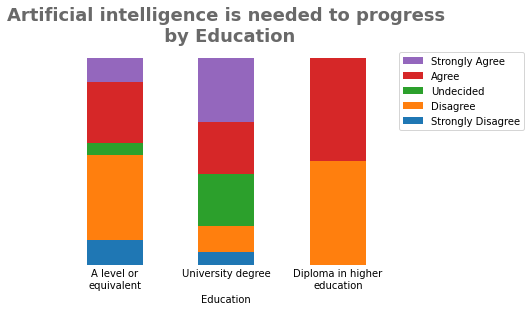

In [23]:
eduprog = pd.crosstab(df['Education'],df['Progression'], normalize='index')*100
eduprog.round(1)

ax = eduprog.plot.bar(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(progresslables),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])

ax.set_xticklabels(educationlabels)
plt.xticks(rotation=360)

ax.set_title('Artificial intelligence is needed to progress\n by Education',fontdict=titlefont)
plt.show()

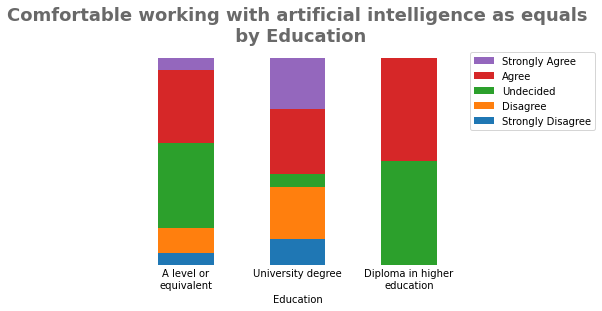

In [24]:
eduwork = pd.crosstab(df['Education'],df['Work with AI'], normalize='index')*100
eduwork.round(1)

ax = eduwork.plot.bar(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(workailables),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])

ax.set_xticklabels(educationlabels)
plt.xticks(rotation=360)

ax.set_title('Comfortable working with artificial intelligence as equals\n by Education',fontdict=titlefont)
plt.show()

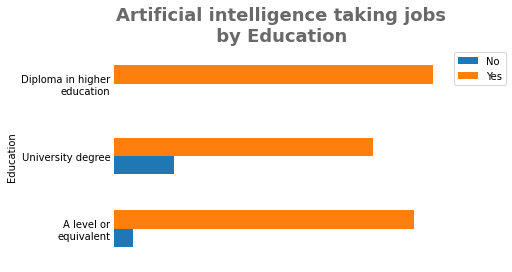

In [38]:
edujob = pd.crosstab(df['Education'],df['Taking job'], normalize='index')*100
label=['Yes','No']
ax = edujob.plot.barh()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.legend(bbox_to_anchor=(1.0,1.0))

ax.set_yticklabels(educationlabels)

ax.set_title('Artificial intelligence taking jobs\n by Education ',fontdict=titlefont)
plt.show()

# GENDER - exploratory visualizations

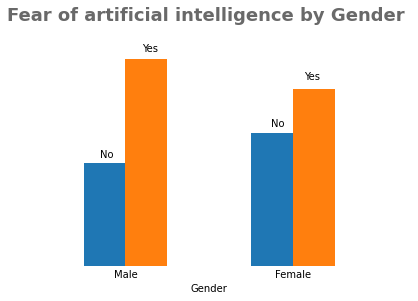

In [26]:
table = pd.crosstab(df['Gender'],df['Fear of AI'], normalize='index')*100
label=['Yes','No']
ax = table.plot.bar()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])


ax.get_legend().remove()

ax.text(0.1,69,'Yes')
ax.text(-0.15,35,'No')

ax.text(1.07,60,'Yes')
ax.text(0.87,45,'No')
plt.xticks(rotation=360)

ax.set_title('Fear of artificial intelligence by Gender ', y=1.1,fontdict=titlefont)
plt.show()

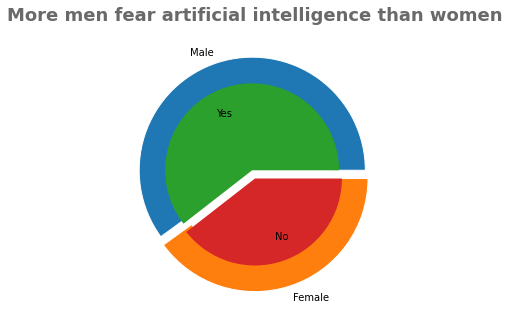

In [27]:
# Make data: I have 3 groups and 7 subgroups
gendernames=['Male', 'Female']
group_size=[12,11,30]
fearofainames=['Yes','No']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]

explode = (0.1,0)

gender = df['Gender'].value_counts()
fear = df['Fear of AI'].value_counts()

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(gender, radius=1.3, labels=gendernames, explode=explode)
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(fear, radius=1.3-0.3, labels=fearofainames, labeldistance=0.7, explode=explode)
plt.setp( mypie, width=0.4, edgecolor='white')
plt.margins(0,0)


ax.set_title('More men fear artificial intelligence than women', y=1.2,fontdict=titlefont)
# show it
plt.show()


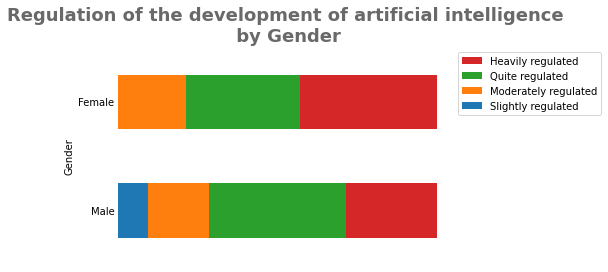

In [19]:
df['Gender'] = df['Gender'].astype(pd.CategoricalDtype(categories=['Male','Female'],ordered=False))
genreg = pd.crosstab(df['Gender'],df['Regulation'], normalize='index')*100
genreg.sort_values(by=5,inplace =True)
genreg.round(1)

ax = genreg.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(regulationlabels),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])
ax.set_title('Regulation of the development of artificial intelligence\n by Gender', fontdict=titlefont)
plt.show()

<Figure size 576x432 with 0 Axes>

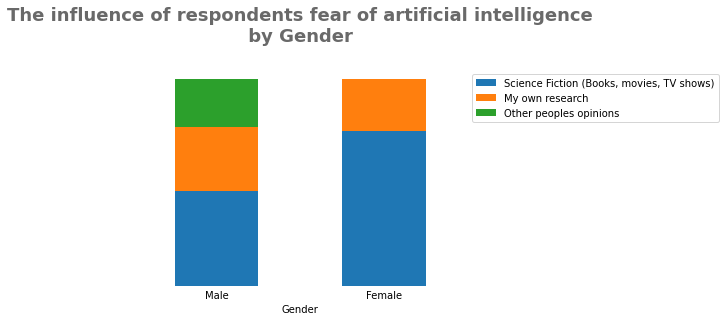

In [28]:
fig = plt.figure(figsize=(8,6))
fearingentable = pd.crosstab(df['Gender'],df['Fear influence'], normalize='index')*100
ax = fearingentable.plot.bar(stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])

ax.legend(bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_title('The influence of respondents fear of artificial intelligence\n by Gender ', y=1.1,fontdict=titlefont)
plt.show()

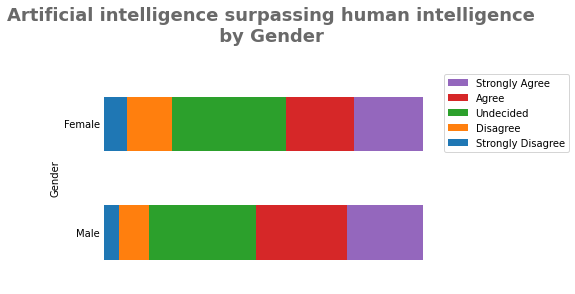

In [29]:
genintel = pd.crosstab(df['Gender'],df['Intelligence'], normalize='index')*100
genintel.round(1)

ax = genintel.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(intelligencelabels),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_title('Artificial intelligence surpassing human intelligence\n by Gender ', y=1.1,fontdict=titlefont)
plt.show()

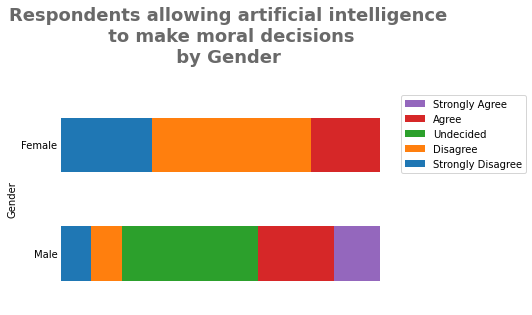

In [30]:
genmoral = pd.crosstab(df['Gender'],df['Moral decision'], normalize='index')*100
genmoral.round(1)

ax = genmoral.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(morallabels),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.set_title('Respondents allowing artificial intelligence\n to make moral decisions\n by Gender ', y=1.1,fontdict=titlefont)
plt.show()

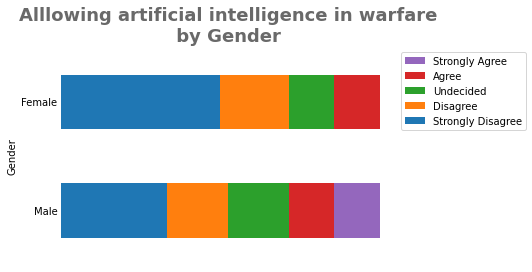

In [31]:
genwar = pd.crosstab(df['Gender'],df['Warfare'], normalize='index')*100
genwar.round(1)

ax = genwar.plot.barh(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(warfarelables),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])
ax.set_title('Alllowing artificial intelligence in warfare\n by Gender ',fontdict=titlefont)
plt.show()

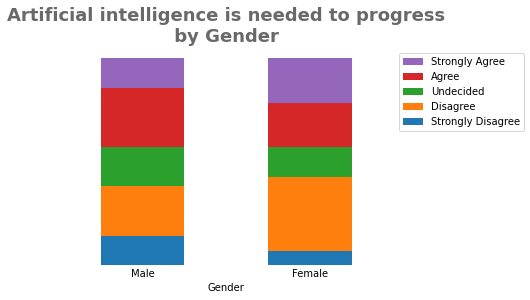

In [32]:
genprog = pd.crosstab(df['Gender'],df['Progression'], normalize='index')*100
genprog.round(1)

ax = genprog.plot.bar(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(progresslables),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])


plt.xticks(rotation=360)

ax.set_title('Artificial intelligence is needed to progress\n by Gender ',fontdict=titlefont)
plt.show()

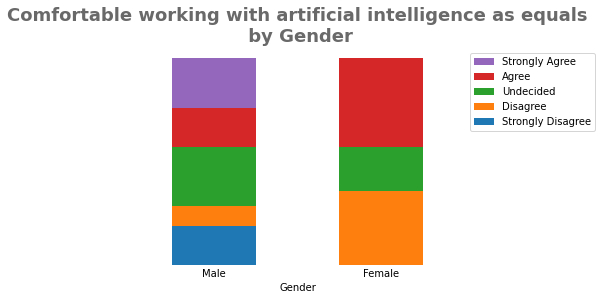

In [33]:
genwork = pd.crosstab(df['Gender'],df['Work with AI'], normalize='index')*100
genwork.round(1)

ax = genwork.plot.bar(stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(workailables),bbox_to_anchor=(1.0,1.0))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])


plt.xticks(rotation=360)

ax.set_title('Comfortable working with artificial intelligence as equals\n by Gender',fontdict=titlefont)
plt.show()

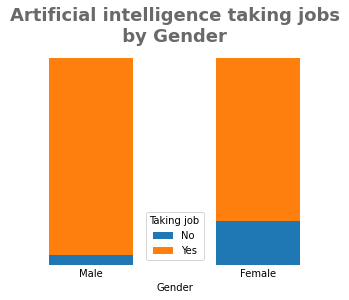

In [34]:
genjob = pd.crosstab(df['Gender'],df['Taking job'], normalize='index')*100
label=['Yes','No']
ax = genjob.plot.bar(stacked = True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])


plt.xticks(rotation=360)

ax.set_title('Artificial intelligence taking jobs\n by Gender ',fontdict=titlefont)
plt.show()

<Figure size 576x432 with 0 Axes>

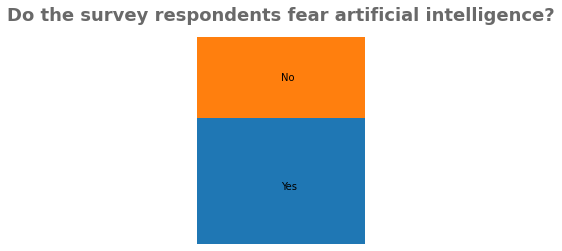

In [35]:
fig = plt.figure(figsize=(8,6))
ax= df['Fear of AI'].value_counts().to_frame().T.plot.bar(stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

ax.get_legend().remove()

ax.text(0,10,'Yes')
ax.text(0,30,'No')

ax.set_title('Do the survey respondents fear artificial intelligence?', fontdict=titlefont)
plt.show()